## Aufgabe: Grafik mit Slider steuern

In einer der letzten Lektionen haben wir eine Weltkarte der Meteoriteneinschläge entwickelt. 

**Aufgabe:** Passe diese Auswertung so an, dass nach dem Jahr gefiltert wird, und sich dieses per Slider anpassen lässt!

In [1]:
import pandas as pd

df = pd.read_csv("./../data/meteorite-landings.csv")
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [2]:
df2 = df[df["reclat"].notnull()]
df3 = df2[df2["reclong"].notnull()]

df3.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


Grafik wird berechnet...


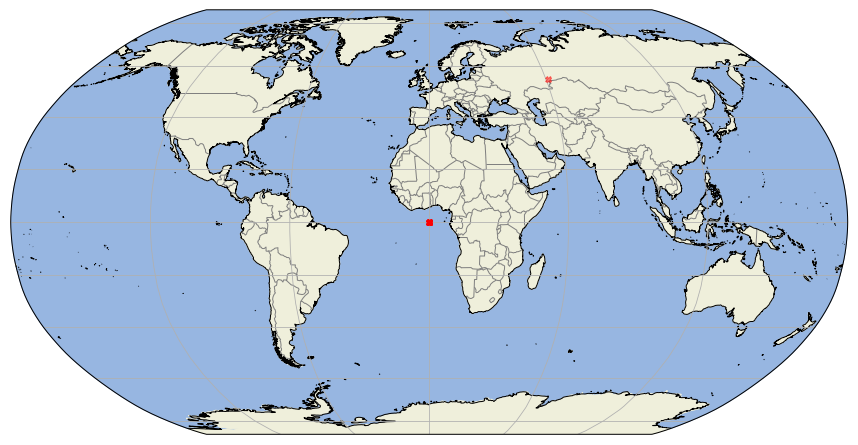

In [19]:
%matplotlib inline

import ipywidgets as widgets
from IPython.display import display, clear_output

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


year_slider = widgets.IntSlider(min=1880, max=2020, value=2010)
button = widgets.Button(description="Grafik berechnen!")

def on_button_click(b):
    clear_output()
    print("Grafik wird berechnet...")
    
    df_now = df3[df3["year"] == year_slider.value]
    long = df_now["reclong"]
    lat = df_now["reclat"]
    
    fig = plt.figure(figsize=(15, 20))
    ax = plt.axes(projection=ccrs.Robinson())

    ax.set_global()
    ax.coastlines(resolution="50m")
        
    if len(long) != 0 and len(lat) != 0:
        ax.plot(long, lat, linestyle=" ", marker="X", transform=ccrs.PlateCarree(), color=(1, 0, 0), alpha=0.5)

    ax.add_feature(cfeature.OCEAN, zorder=0)
    ax.add_feature(cfeature.LAND, zorder=0)
    ax.add_feature(cfeature.BORDERS, zorder=0, edgecolor='gray')

    ax.gridlines()

    plt.show()
    
button.on_click(on_button_click)

display(year_slider)
display(button)